In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,Conv2D,Dropout,Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

x_train = x_train/255
x_test  = x_test/255

In [3]:
x_train = x_train/255
x_test  = x_test/255

In [4]:
x_train = np.expand_dims(x_train,-1)
x_test  = np.expand_dims(x_test,-1)

In [5]:
num_classes = len(set(y_train))

In [6]:
i = Input(shape=(x_train[0].shape))
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu', groups=4)(x)
x = Flatten()(x)
x = Dropout(.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(num_classes,activation='softmax')(x)
model = Model(i,x)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [8]:
r = model.fit(x_train,y_train, 
          validation_data=(x_test,y_test),
          epochs=15)

Epoch 1/15
1875/1875 [==============================] - 41s 21ms/step - loss: 0.5434 - accuracy: 0.7995 - val_loss: 0.4477 - val_accuracy: 0.8392
Epoch 2/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3798 - accuracy: 0.8584 - val_loss: 0.3577 - val_accuracy: 0.8666
Epoch 3/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3291 - accuracy: 0.8765 - val_loss: 0.3368 - val_accuracy: 0.8745
Epoch 4/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2972 - accuracy: 0.8889 - val_loss: 0.3157 - val_accuracy: 0.8834
Epoch 5/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2732 - accuracy: 0.8962 - val_loss: 0.3079 - val_accuracy: 0.8897
Epoch 6/15
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2534 - accuracy: 0.9030 - val_loss: 0.3064 - val_accuracy: 0.8901
Epoch 7/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2376 - accuracy: 0.9087 - val_loss: 0.2939 -

In [9]:
model.save("fashion_mnist.h5")

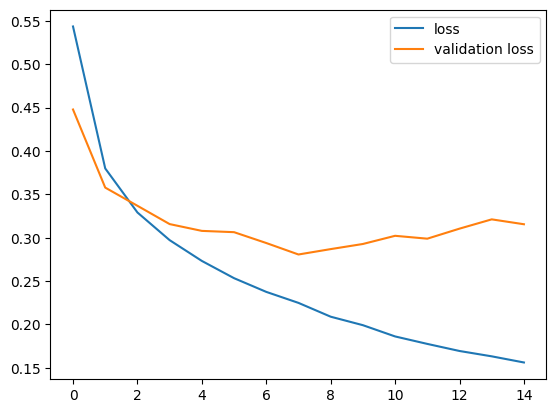

In [10]:
plt.plot(r.history['loss'],label="loss")
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()

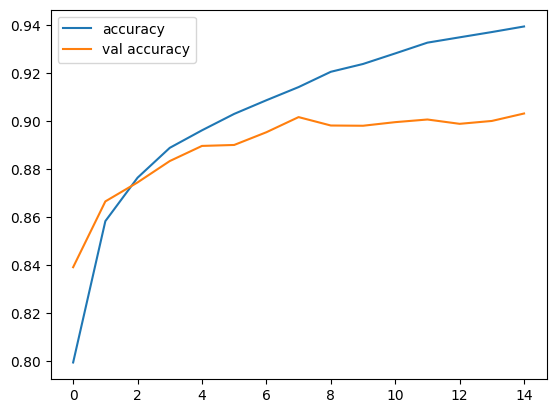

In [11]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()

In [12]:
y_predicted = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 2s 5ms/step


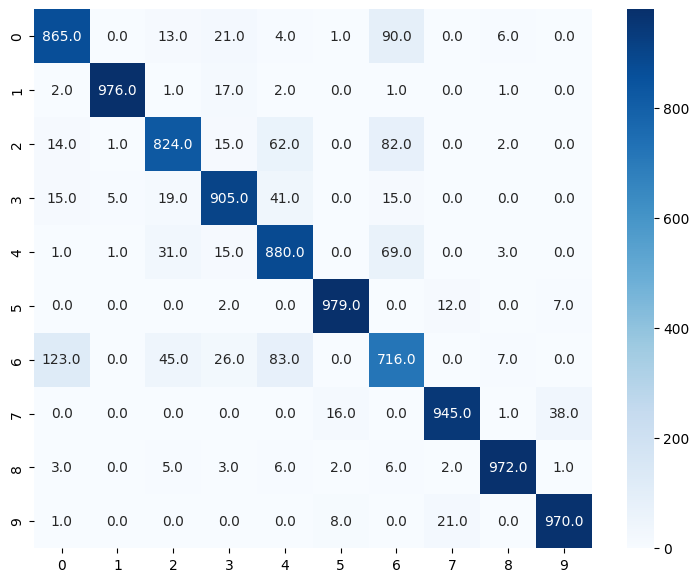

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(9,7))
plt.xlabel('predicted')
plt.ylabel('true')
cm2= sns.heatmap(cm, annot=True,
            cmap='Blues', fmt='.1f')
plt.ioff()
plt.show()

In [14]:
# misclassified items
misclassified_idx = np.where(y_predicted!=y_test)
len(misclassified_idx[0])

968

In [15]:
def top_n_accuracy(n):
    preds = model.predict(x_test)
    correct_predictions = 0
    for i in range(len(preds)):
        top_n_predictions = np.squeeze(np.argsort(preds[i]))[::-1][:n]
        if y_test[i] in top_n_predictions:
            correct_predictions +=1
    return (correct_predictions/len(y_test))*100

In [16]:
#top 5 accuracy
print(top_n_accuracy(5))

313/313 [==============================] - 2s 5ms/step
99.77000000000001


In [17]:
#top 1 accuracy
print(top_n_accuracy(1))

313/313 [==============================] - 2s 5ms/step
90.32
